# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [74]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Meta) </font>

In [75]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'META'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [76]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-10-13,323.529999,325.049988,312.369995,314.690002,314.690002,21341000
2023-10-16,318.640015,321.820007,315.519989,321.149994,321.149994,16536100
2023-10-17,318.179993,324.399994,317.299988,324.000000,324.000000,16387800


In [77]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2874 entries, 2012-05-18 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2874 non-null   float64
 1   High       2874 non-null   float64
 2   Low        2874 non-null   float64
 3   Close      2874 non-null   float64
 4   Adj Close  2874 non-null   float64
 5   Volume     2874 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 157.2 KB


In [78]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [79]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2.874000e+03
mean,154.716935,156.731514,152.759937,154.779951,154.779951,3.081057e+07
std,88.826199,89.975269,87.732567,88.865910,88.865910,2.652101e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,80.182501,81.152502,79.474998,80.472502,80.472502,1.638815e+07
50%,151.715004,153.455002,149.755005,151.500000,151.500000,2.308740e+07
75%,200.445000,203.472500,198.200005,200.764999,200.764999,3.541212e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,5.735764e+08


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [80]:
stock_data.shape
# kích thước dữ liệu

(2874, 6)

In [81]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [82]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

### Vẽ biểu đồ phân tích

1: Biểu đồ cột

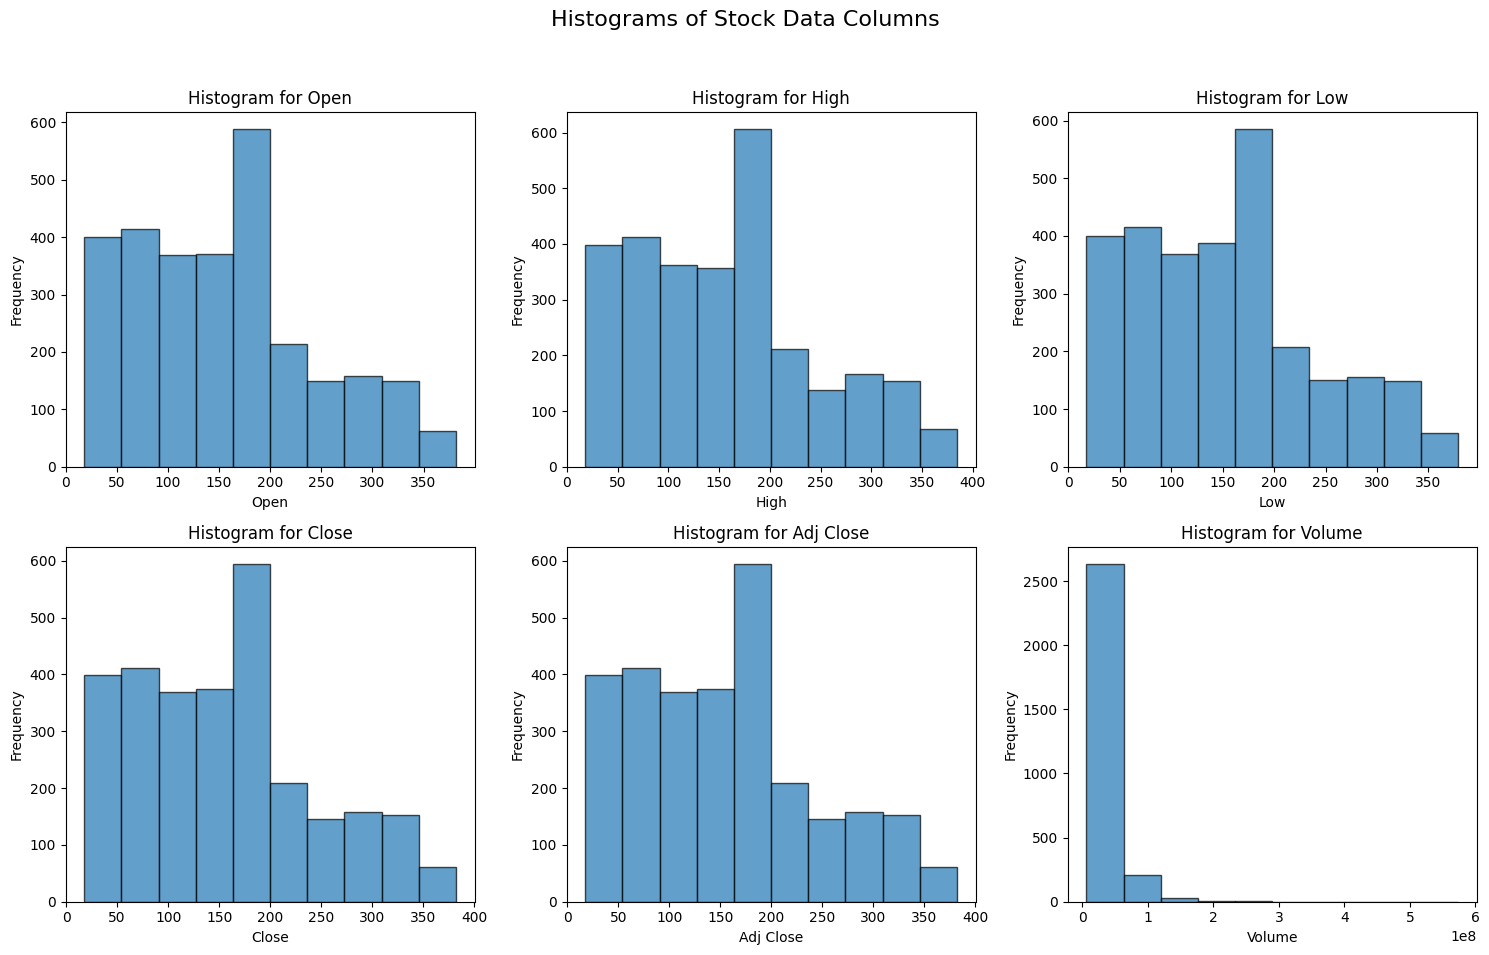

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Histograms of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ histogram
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].hist(stock_data[column], bins=10, edgecolor='k', alpha=0.7)
    axs[row, col].set_title(f'Histogram for {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ hộp

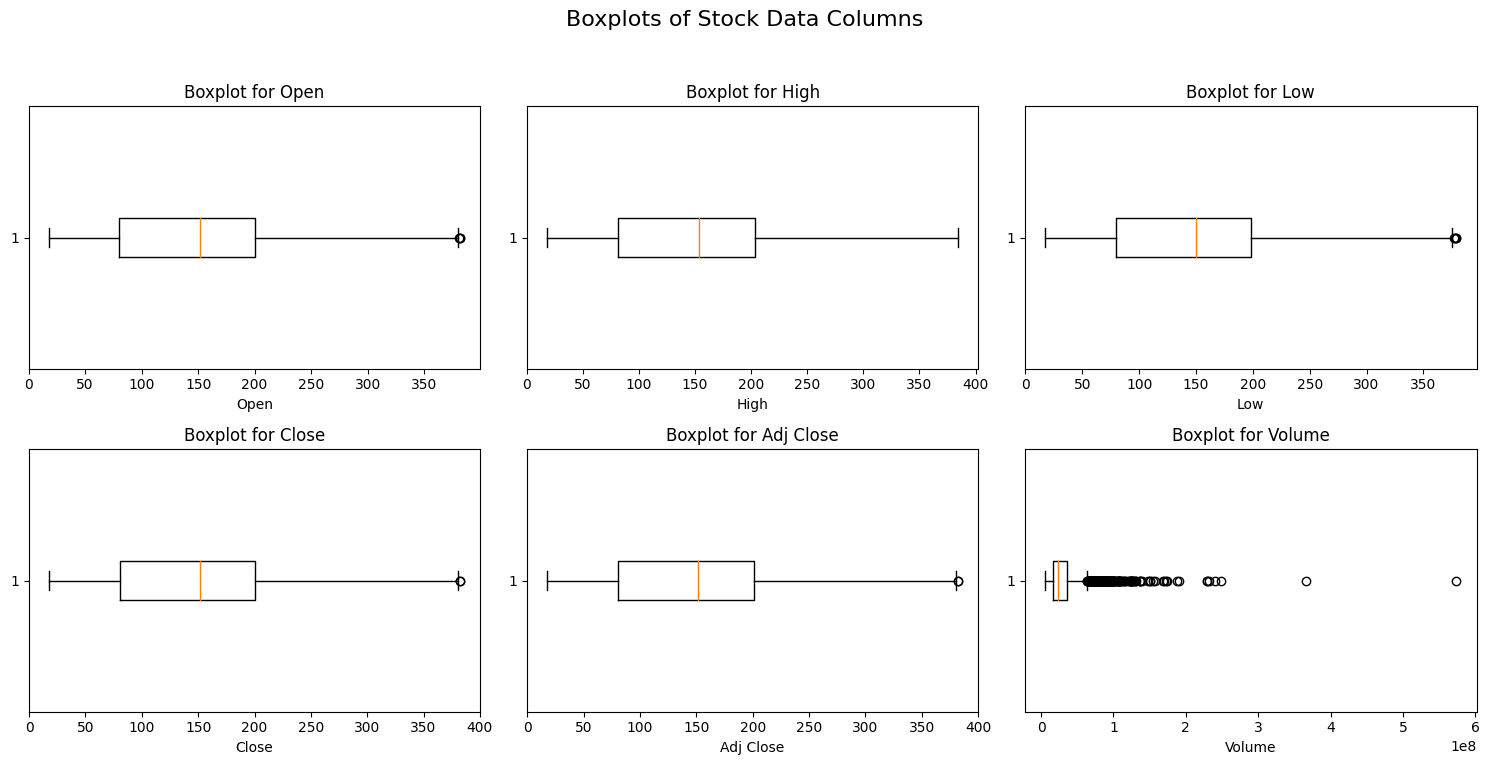

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Boxplots of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ boxplot
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].boxplot(stock_data[column], vert=False)
    axs[row, col].set_title(f'Boxplot for {column}')
    axs[row, col].set_xlabel(column)

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ heatmap

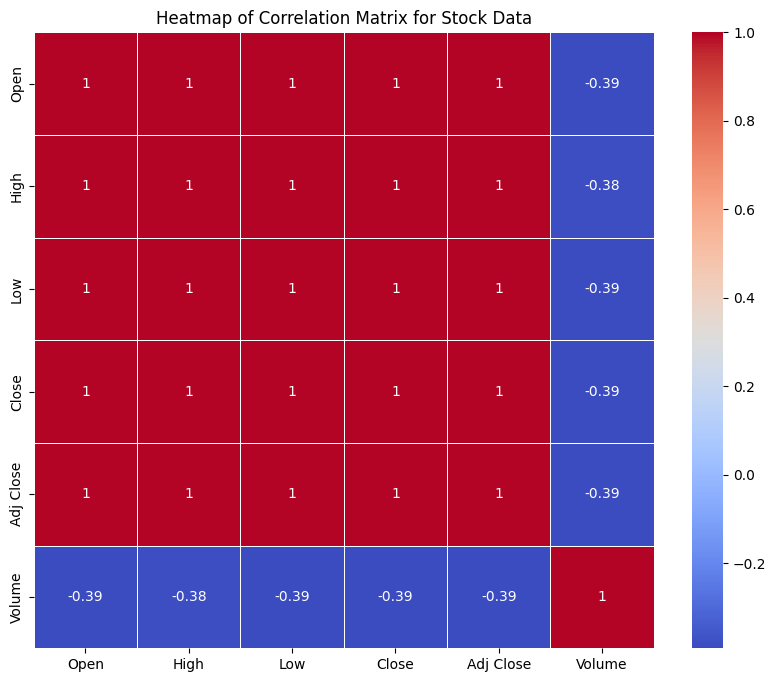

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()


Biểu đồ scatter thể hiện sự tuyến tính giữa từng cột với cột adj close

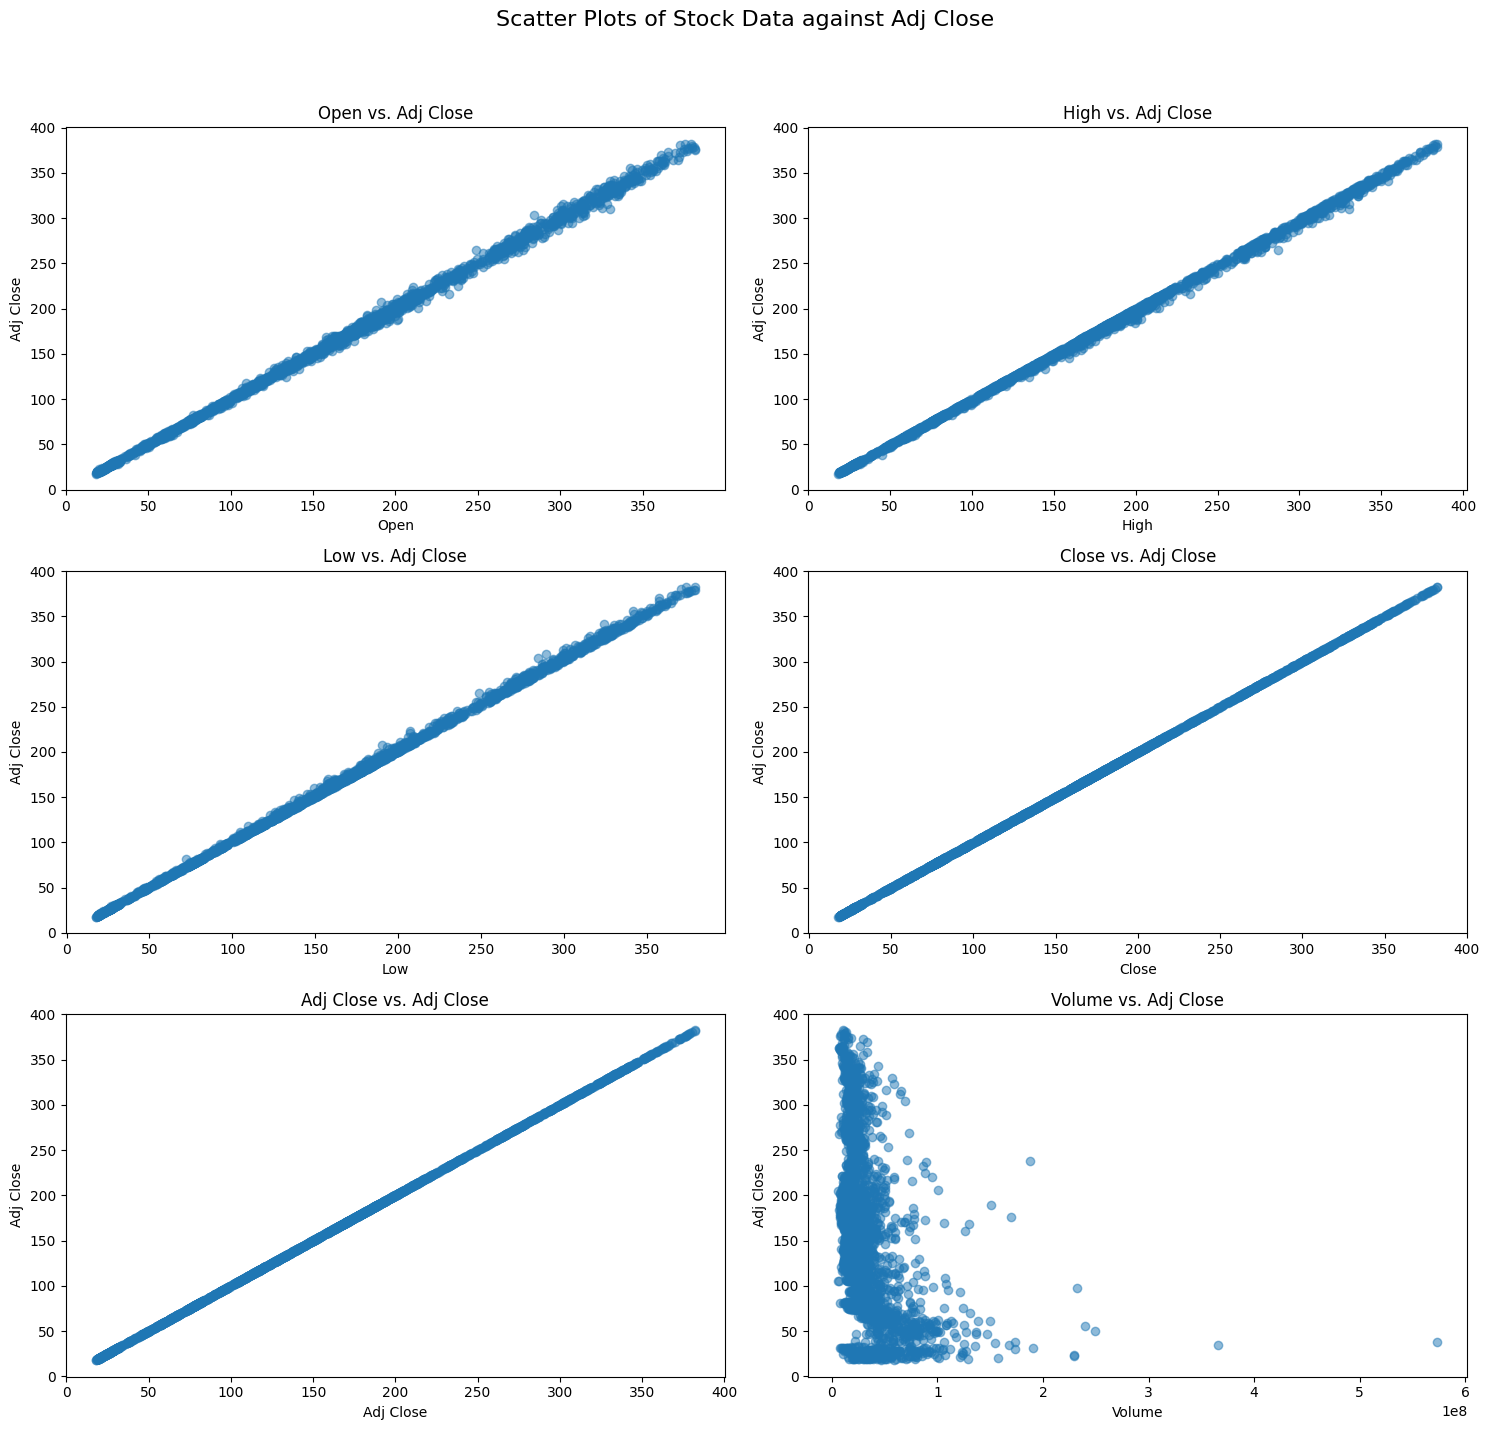

In [86]:

# Tính toán số lượng cột và số lượng hàng dựa vào số cột trong DataFrame
num_cols = len(stock_data.columns)
num_rows = (num_cols + 1) // 2  # Số hàng làm tròn lên nếu có số lẻ cột

# Tạo subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle('Scatter Plots of Stock Data against Adj Close', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ scatter
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 2)
    axs[row, col].scatter(stock_data[column], stock_data['Adj Close'], alpha=0.5)
    axs[row, col].set_title(f'{column} vs. Adj Close')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Adj Close')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### <font color = 'yellow' >Thông qua biểu đồ heatmap và biểu đồ scatter, ta thấy sự phụ thuộc tuyến tính giữa cột Adj close với các cột Open, hight, low, close. <br>Vì thế nên ta sẽ chia tập X, y như sau <font>

In [87]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2023-10-13    314.690002
2023-10-16    321.149994
2023-10-17    324.000000
2023-10-18    316.970001
2023-10-19    312.809998
Name: Adj Close, Length: 2874, dtype: float64

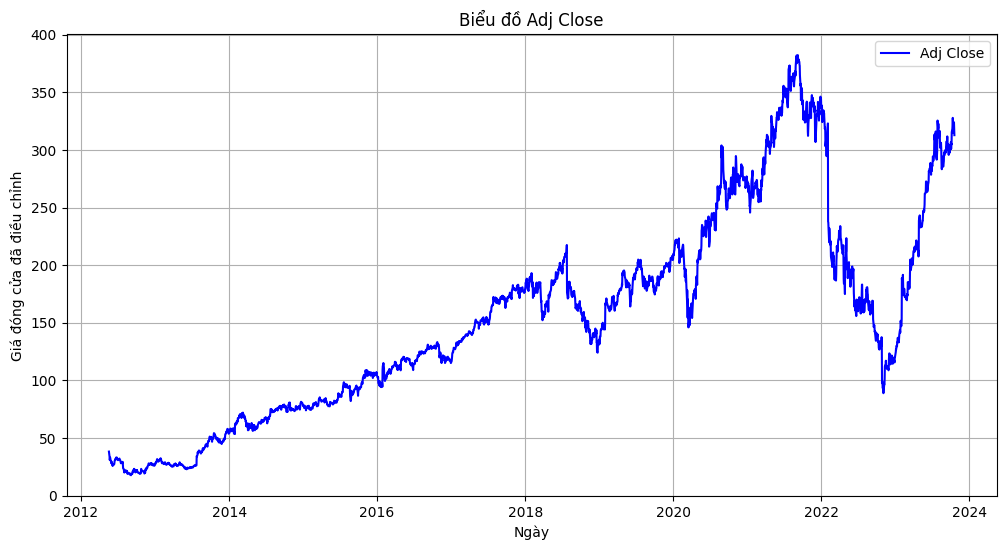

In [88]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# Chọn các cột trừ cột 'Adj Close' và 'Volume làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close','Volume'])
X

,Open,High,Low,Close
Date,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000
2012-05-21,36.529999,36.660000,33.000000,34.029999
2012-05-22,32.610001,33.590000,30.940001,31.000000
2012-05-23,31.370001,32.500000,31.360001,32.000000
2012-05-24,32.950001,33.209999,31.770000,33.029999
...,...,...,...,...
2023-10-13,323.529999,325.049988,312.369995,314.690002
2023-10-16,318.640015,321.820007,315.519989,321.149994
2023-10-17,318.179993,324.399994,317.299988,324.000000


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

In [90]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(2299, 4)
(575, 4)
(2299,)
(575,)


In [92]:
X_train

,Open,High,Low,Close
Date,,,,
2018-09-07,160.309998,164.630005,160.160004,163.039993
2017-02-07,132.240005,133.000000,131.660004,131.839996
2014-10-15,71.690002,73.800003,70.320000,73.209999
2022-07-27,162.589996,170.869995,162.020004,169.580002
2014-10-24,80.199997,80.820000,79.320000,80.669998
...,...,...,...,...
2018-11-20,127.029999,134.160004,126.849998,132.429993
2016-09-26,127.370003,128.160004,126.800003,127.309998
2016-11-14,119.129997,119.129997,113.550003,115.080002


In [93]:
X_test

,Open,High,Low,Close
Date,,,,
2015-04-15,83.550003,83.660004,82.269997,82.709999
2020-08-10,268.040009,273.859985,259.690002,263.000000
2017-07-05,149.000000,150.850006,148.130005,150.339996
2019-04-18,178.800003,178.880005,177.339996,178.279999
2016-02-10,101.550003,103.250000,100.239998,101.000000
...,...,...,...,...
2019-11-14,192.929993,194.029999,191.449997,193.149994
2013-01-14,32.080002,32.209999,30.620001,30.950001
2019-12-30,207.860001,207.899994,203.899994,204.410004


In [94]:
y_train

Date
2018-09-07    163.039993
2017-02-07    131.839996
2014-10-15     73.209999
2022-07-27    169.580002
2014-10-24     80.669998
                 ...    
2018-11-20    132.429993
2016-09-26    127.309998
2016-11-14    115.080002
2017-07-12    158.899994
2015-10-20     97.000000
Name: Adj Close, Length: 2299, dtype: float64

In [95]:
y_test

Date
2015-04-15     82.709999
2020-08-10    263.000000
2017-07-05    150.339996
2019-04-18    178.279999
2016-02-10    101.000000
                 ...    
2019-11-14    193.149994
2013-01-14     30.950001
2019-12-30    204.410004
2013-05-22     25.160000
2020-04-07    168.830002
Name: Adj Close, Length: 575, dtype: float64

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [96]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("../Scaler_data/Scaler_Meta.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)

In [97]:
X_train, X_train.shape

(array([[0.39117162, 0.39982519, 0.39475725, 0.39871038],
        [0.31397142, 0.31341858, 0.3158667 , 0.31310193],
        [0.14744225, 0.15169646, 0.14607208, 0.15222939],
        ...,
        [0.27791529, 0.2755286 , 0.2657366 , 0.26711484],
        [0.38066559, 0.38488228, 0.3837956 , 0.38735079],
        [0.22180969, 0.22214937, 0.21870674, 0.21750584]]),
 (2299, 4))

In [98]:
X_test,X_test.shape

(array([[0.18006052, 0.17863193, 0.17915074, 0.17829606],
        [0.68745878, 0.69821886, 0.67026519, 0.67298671],
        [0.36006601, 0.36218109, 0.36145714, 0.36386335],
        ...,
        [0.52194721, 0.51802983, 0.51583346, 0.51222392],
        [0.02081958, 0.02070699, 0.02040082, 0.02038689],
        [0.42274476, 0.42375568, 0.41095055, 0.41459735]]),
 (575, 4))

# <font color = 'red'>3:Huấn luyện mô hình<font>

In [99]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [100]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [101]:
y_pred = model.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [102]:
y_pred.shape

(575,)

In [103]:
y_test.shape

(575,)

In [104]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 8.361307957400403e-27
R-squared (R2) Score: 1.0
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 8.871087978008575e-27
R-squared (R2) Score: 1.0


In [105]:
print(y_test)

Date
2015-04-15     82.709999
2020-08-10    263.000000
2017-07-05    150.339996
2019-04-18    178.279999
2016-02-10    101.000000
                 ...    
2019-11-14    193.149994
2013-01-14     30.950001
2019-12-30    204.410004
2013-05-22     25.160000
2020-04-07    168.830002
Name: Adj Close, Length: 575, dtype: float64


In [106]:
print(y_pred)

[ 82.70999908 263.         150.33999634 178.27999878 101.
 124.90000153 180.86999512 152.13000488 128.6499939  114.48000336
 285.29000854  87.55000305  98.47000122 170.80000305 221.49000549
 188.47000122  35.43000031 120.75       114.16000366 162.92999268
 173.50999451 204.19000244 258.32998657 185.08999634 206.17999268
  50.11000061  54.56000137  62.75999832 286.01998901  94.44999695
 171.6499939   28.63999939 175.72999573 346.22000122 203.77000427
 302.54998779 154.47000122  25.12999916 185.36999512 158.05000305
 101.61000061 245.41999817 145.47000122 184.75999451 186.82000732
 134.52000427 104.04000092  41.34000015 198.44999695 308.86999512
 173.74000549 148.24000549 298.95999146 373.92001343  41.77999878
 181.46000671 114.19999695 113.93000031  68.73999786  55.90999985
  31.71999931 158.53999329 149.00999451 184.         155.27000427
 121.91999817 221.44000244 191.63000488 116.34999847 316.97000122
 239.72999573 334.36999512 185.36999512 190.28999329 202.08000183
 186.05999756 117.

In [107]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2015-04-15,82.709999,82.709999
2020-08-10,263.000000,263.000000
2017-07-05,150.339996,150.339996
2019-04-18,178.279999,178.279999
2016-02-10,101.000000,101.000000
2016-08-11,124.900002,124.900002
2019-05-23,180.869995,180.869995
2017-05-26,152.130005,152.130005
2016-09-19,128.649994,128.649994


<AxesSubplot:xlabel='Date'>

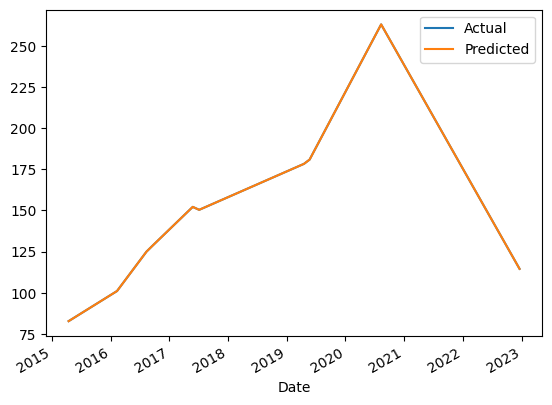

In [108]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

Ta đang triển khai mô hình trong biến model

In [109]:
import pickle
# Tải mô hình từ file
with open('../Model_data/Meta.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)